# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [3]:
from sklearn.linear_model import LinearRegression
direct_bilirubin = data['Direct_Bilirubin']
total_bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(total_bilirubin).reshape(-1,1), direct_bilirubin)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.18116743679724845
slope: [0.39557996]


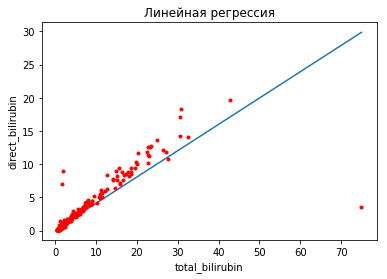

In [4]:
plt.xlabel('total_bilirubin')
plt.ylabel('direct_bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(total_bilirubin), max(total_bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(total_bilirubin, direct_bilirubin, 'r.')
plt.show()

In [7]:
model.predict(np.array([3.9]).reshape(-1, 1))

array([1.72392929])

Значение total_bilirubin в таблице - 3.9 при значении direct_bilirubin - 2.0
Модель при значении total_bilirubin 3.9 предсказывает значение direct_bilirubin 1.7. Близко, но погрешность не совсем маленькая (0.3)

In [8]:
model.predict(np.array([10.9]).reshape(-1, 1))

array([4.49298903])

Значение total_bilirubin в таблице - 10.9 при значении direct_bilirubin - 5.5
Модель при значении total_bilirubin 10.9 предсказывает значение direct_bilirubin 4.5. Погрешность составляет 1 единицу

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

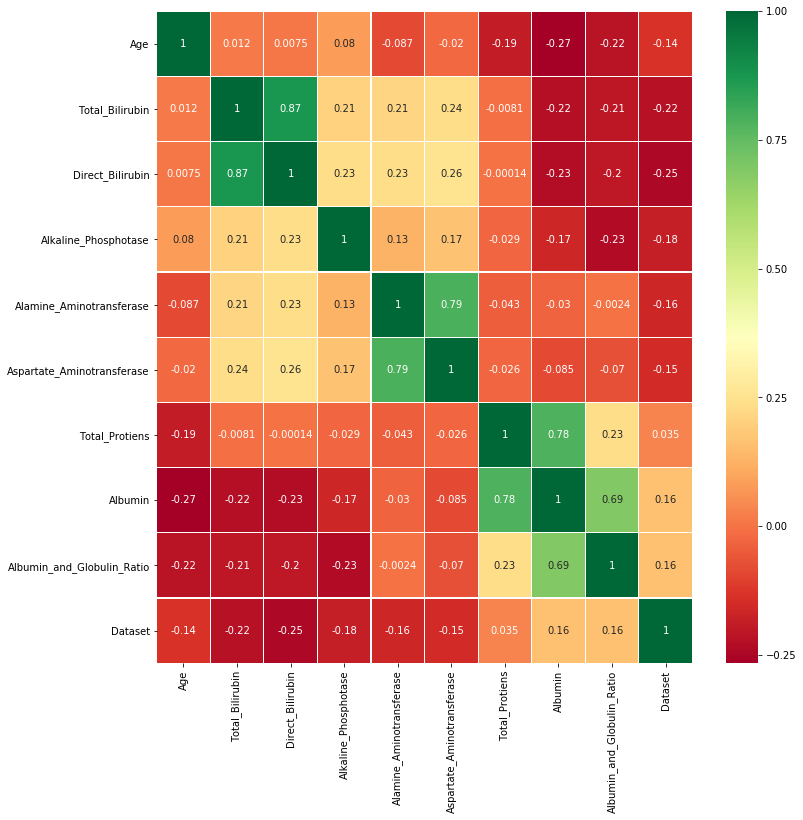

In [9]:
# матрица корреляции
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

На показатель Dataset больше всего влияют показатели Albumin и Albumin_and_Globulin_Ratio

In [13]:
# удалим пустые значения
data = data.dropna()

In [14]:
albumin = data['Albumin']
albumin_and_globulin_ratio = data['Albumin_and_Globulin_Ratio']
dataset = data['Dataset']
x = np.vstack([np.array(albumin), np.array(albumin_and_globulin_ratio)]).T
print('x - это двумерная матрица, где колонки - это albumin и albumin_and_globulin_ratio : ')
print(x[:3])
y = np.array(dataset)
model = LinearRegression().fit(x, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

x - это двумерная матрица, где колонки - это albumin и albumin_and_globulin_ratio : 
[[3.3  0.9 ]
 [3.2  0.74]
 [3.3  0.89]]
intercept: 0.9889106127885418
slope: [0.05126106 0.14273578]


Можно заметить, что переменная dataset сильнее зависит от albumin_and_globulin_ratio (0.14), чем от albumin (0.05)

In [20]:
print('Предсказание модели: ', model.predict(np.array([[3.3, 0.9]])))

Предсказание модели:  [1.2865343]


In [32]:
print('Предсказание модели: ', model.predict(np.array([[4.1, 1.2]])))

Предсказание модели:  [1.37036388]


Модель неточна, так как в первом случае она предсказала значение dataset 1.3, когда в таблице значение 1. Во втором случае модель предсказала значение 1.4, когда в таблице значение 2.

Посчитать квартили для всех колонок. 

In [24]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

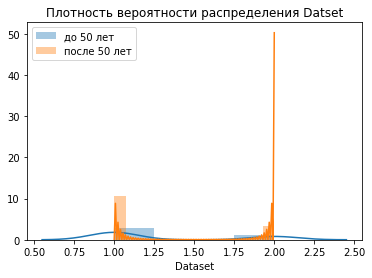

In [25]:
dataset_under_50 = data[data['Age']<=50]['Dataset']
dataset_over_50 = data[data['Age']>50]['Dataset']
sns.distplot(dataset_under_50)
sns.distplot(dataset_over_50)
plt.title('Плотность вероятности распределения Datset')
plt.legend(['до 50 лет', 'после 50 лет'])
plt.show()

In [33]:
# медиана для выборки с людьми до 50 лет
dataset_under_50.mean()

1.3109919571045576

In [34]:
# медиана для выборки с людьми после 50 лет
dataset_over_50.mean()

1.2378640776699028

Средние значения практически одинаковы

In [35]:
print('Квартиль 0.5 для выборки с людьми до 50 лет')
dataset_under_50.quantile([.5]) 

Квартиль 0.5 для выборки с людьми до 50 лет


0.5    1.0
Name: Dataset, dtype: float64

In [36]:
print('Квартиль 0.5 для выборки с людьми после 50 лет')
dataset_over_50.quantile([.5]) 

Квартиль 0.5 для выборки с людьми после 50 лет


0.5    1.0
Name: Dataset, dtype: float64

Как видно, квартили 0.5 у двух выборок так же не отличаются


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [37]:
ill_total_bilirubin = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_1samp(ill_total_bilirubin, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.615411977932304, pvalue=1.4695954513944632e-63)

p-value равно 1.47, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между значением критерия Total_Bilirubin у больных людей и генеральной совокупности в целом. 

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [38]:
ill_total_bilirubin = data[data['Dataset']==2]['Total_Bilirubin']
healthy_total_bilirubin = data[data['Dataset']==1]['Total_Bilirubin']

stats.ttest_ind(ill_total_bilirubin, healthy_total_bilirubin)

Ttest_indResult(statistic=-5.422946004172417, pvalue=8.632557516910643e-08)

T-значение -5.42, p-value равно 8.63, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между значением критерия Total_Bilirubin у больных и здоровых людей.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [43]:
dataset_under_30 = data[data['Age']<30]['Dataset']
dataset_under_55 = data[(data['Age']>=30) & (data['Age']<=55)]['Dataset']
dataset_over_55 = data[data['Age']>55]['Dataset']

stats.f_oneway(dataset_under_30, dataset_under_55, dataset_over_55)

F_onewayResult(statistic=8.966878570923486, pvalue=0.00014626095691240386)

Так как результат p-value равен 0.00015, что меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным возрастом. Логично, что чем больше возраст, тем больше значение больных людей, что можно наблюдать в таблице.

Вопросы задавать на почту yustiks@gmail.com